<h1 align="center">University of Tehran</h1>
<h2 align="center">CA1</h2>
<h3 align="center">Aryan Bastani</h3>
<h3 align="center">810100088</h3>








</br>
</br>
<h1 align="center">Genetic Algorithm and Optimization Problem</h1>

## Overview

This project involves the implementation of genetic algorithms, which are inspired by natural selection, to solve an optimization problem. Genetic algorithms are generally used for problems with large state spaces, and they involve sampling from a population, combining and modifying individuals, and evaluating them to improve solutions generation by generation.

## Problem Description

The problem at hand is a variant of the Knapsack Problem. You have a backpack and you're planning to go on a picnic with your friends. You have a variety of snacks and treats that you plan to bring along. Each snack has a specific value and weight, and you can choose any amount of it to bring along. However, there are a few constraints to consider:

- The total value of the snacks you bring should exceed a specific limit given in the input.
- The total weight of the snacks you bring should be less than a specific limit given in the input.
- The variety (number of types) of snacks you choose should fall within a specific range given in the input.
- The weight chosen from each snack should not exceed the available weight of that snack.

The snacks are given in the input as a CSV file. Consider the problem for the following inputs:

- Maximum weight that can be chosen: 10 units
- Minimum value that needs to be chosen: 12 units
- Range of the number of types of snacks chosen: from 2 to 4

## Consts
Since we have lots of const variables like chance of mutation and so forth, I decided to store all of them in a class.
#### Constants Details

1. **Crossover Probability**: The probability of crossover (recombination) occurring during the genetic algorithm's evolution. It determines how often genetic material from two parents combines to create offspring.

2. **Mutation Probability**: The probability of mutation occurring during the evolution. Mutation introduces small random changes to an individual's genetic material.

3. **Carry Percent**: This represents the percentage of the population that carries over unchanged from one generation to the next. It ensures that some individuals persist without modification.

4. **Maximum Number of Evolutions**: The maximum number of generations or iterations the genetic algorithm will run.

5. **Selection Weights**: A list of weights assigned to different selection methods (e.g., roulette wheel selection, tournament selection). These weights influence the probability of selecting an individual for reproduction. The list of weights is **[1, 2, 3]**.


In [181]:
import random
from dataclasses import dataclass
from functools import  reduce
from math import  floor 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from colorama import Fore

@dataclass
class Consts:
    crossoverProbability : float
    mutationProbability : float
    carryPercent : float
    maxNumOfEvolutions : int
    selectionWeights : list[int]

## Input
I define a class for storing inputs of the problem. (mostly so we can distinguish the input variables from consts)

In [183]:
@dataclass
class Inputs:
    maxWeight: int
    minValue : int
    minNumber : int
    maxNumber: int



## Data Initialization
Here I initialize constants and the inputs. Inputs are the same as the example in the CA pdf.<br>
(note that the constants can be set to other values later if they don't perform as expected)

In [201]:
snacks = np.genfromtxt('./data/snacks.csv', delimiter=',', skip_header=1, \
                           dtype=[('snack', 'U20'), ('weight', 'f8'), ('value', 'f8')])

CHROMOSOME_SIZE = len(snacks)
POPULATION_SIZE = 700

inputs = Inputs(
    maxWeight = 10,
    minValue = 12,
    minNumber = 2,
    maxNumber = 4
)

consts = Consts(
    crossoverProbability = 0.6,
    mutationProbability = 0.15,
    carryPercent = 0.1,
    maxNumOfEvolutions = 1000,
    selectionWeights = [i for i in range(1, POPULATION_SIZE+1)]
)

CARRY_SIZE = int(consts.carryPercent * POPULATION_SIZE)

# PART 1
## Definition Of Genetic & Chromosome:

#### Genetic:
Each Genetic is a number between 0 and 1, This number will be created randomly in the first.
The value of each Genetic indicates the percent of snake that is used for packing.

In [185]:
class Genetic:
    def __init__(self, packedPercent = None) -> None:
        self.packedPercent = packedPercent

## Chromosome Class

The `Chromosome` class represents an individual in the genetic algorithm population. It plays a crucial role in the optimization process. Let's dive into its details:

### Attributes

- **`genes`**: An array of binary values representing the genetic material. Each gene corresponds to a specific trait or feature.
- **`weight`**: The total weight of the selected snacks (or any other relevant context). It accumulates the weighted contribution of each gene.
- **`fitness`**: The fitness score of the chromosome. It reflects how well the individual adheres to the problem constraints and objectives.

### Methods

1. **`__init__(self)`**:
    - Initializes a new chromosome with random genetic material.
    - Sets the initial values for `genes`, `weight`, and `fitness`.

2. **`calcThings(self)`**:
    - Calculates the weight, fitness, and other relevant information for the chromosome.
    - Considers the selected genes, their weights, and any additional context-specific calculations.

3. **`crossover(self, other) -> tuple`**:
    - Performs crossover (recombination) with another chromosome.
    - Creates two offspring by combining genetic material from both parents.
    - The crossover poit randomly is randomly chosen.
    - Returns a tuple containing the two child chromosomes.

4. **`mutate(self)`**:
    - Introduces random mutations to the chromosome's genes.
    - Mutation ensures genetic diversity and exploration.
    - The mutation probability is controlled by the algorithm's parameters.

In [186]:
class Chromosome:
    def __init__(self):
        self.genes = np.random.randint(0, 2, len(snacks)) * np.random.uniform(0, 1)
        self.calcThings()
        
    def calcThings(self) -> None:
        numOfUsed = 0
        self.weight = 0
        self.fitness = 0
        
        for i in range(len(snacks)):
            self.weight += self.genes[i] * snacks[i]['weight']
            self.fitness += self.genes[i] * snacks[i]['value']
            if(self.genes[i] != 0):
                numOfUsed += 1
                
        cond1 = int (numOfUsed in range(inputs.minNumber, inputs.maxNumber+1))
        cond2 = int(self.fitness >= inputs.minValue)
        cond3 = int(self.weight <= inputs.maxWeight)
        self.fitness *= (cond1 * cond2 * cond3)
        
    def crossover(self, other) -> tuple:
        crossPoint = np.random.randint(0, CHROMOSOME_SIZE)
        
        child1 = Chromosome()
        child2 = Chromosome()
        
        child1.genes[:crossPoint] = self.genes[:crossPoint]
        child1.genes[crossPoint:] = other.genes[crossPoint:]
        
        child2.genes[crossPoint:] = self.genes[crossPoint:]
        child2.genes[:crossPoint] = other.genes[:crossPoint]
        
        return (child1, child2)
    
    def mutate(self) -> None:
        mutateIndex = np.random.randint(0, CHROMOSOME_SIZE)
        
        if np.random.uniform(0, 1) <= consts.mutationProbability:
            self.genes[mutateIndex] = np.random.randint(0, 2) * np.random.uniform(0, 1)
    
        self.calcThings()
        

# PART 2
## Generate the population:
The `createPopulation` function is responsible for generating an initial population of individuals (chromosomes) for a genetic algorithm. These individuals serve as the starting point for the optimization process.
And i Sorted them to get the write selection weights

In [187]:
def createPopulation() -> list[Chromosome]:
    population = [Chromosome() for i in range(POPULATION_SIZE)]
    population.sort(key = lambda x : x.fitness)
    return(population)

# PART3
## define the fitness calculation and Implementation of it
The fitness calculation is already implemented in function `calcThings()` in class `Chromosome`.


# PART 4 & 5
## - Implementation of crossover and mutation, Generating the new evolution
## - Implementation of the genetic algorothm
Mutation and Crossover are already implemented in the class `Chromosome` bet the rest of implementations are as below:

### Genetic Algorithm Class

The `GeneticAlgorithm` class is an implementation of a genetic algorithm. The class has several methods that correspond to the steps of a genetic algorithm.

#### Class Attributes

- **populations**: A list of lists, where each list represents a population of `Chromosome` objects.
- **newPopulation**: A list of `Chromosome` objects that represents the new population being formed.
- **bestChromosome**: The `Chromosome` object with the highest fitness from the All of populations.

#### Methods

**`__init__()`**

This is the constructor method that initializes the `populations`, `newPopulation`, and `bestChromosome` attributes.

**`select_elites()`**

This method selects the elite `Chromosome` objects from the last population and adds them to the new population.

**`updateBestChromosome()`**

This method updates the `bestChromosome` attribute if the `Chromosome` object with the highest fitness in the last population has a higher fitness than the current `bestChromosome`.

**`generateNewPopulation()`**

This method generates a new population. It first selects the elites, then performs crossover and mutation to generate new `Chromosome` objects until the new population is full. The new population is then sorted by fitness.

**`printBestResult()`**

This method prints the best result found by the genetic algorithm. It prints the weight and value packed by the `bestChromosome`.

**`runAlgorithm()`**

This method runs the genetic algorithm for a specified number of evolutions.

**`plotResults()`**

This method plots the fitness of the best `Chromosome` in each population over the generations.

**`showResults()`**

This method shows the results of the genetic algorithm by calling the `printBestResult` and `plotResults` methods.

This class provides a complete implementation of a genetic algorithm, including selection, crossover, mutation, and elitism. It also includes methods for displaying the results of the algorithm.
```

In [188]:
class GeneticAlgorithm:
    def __init__(self):
        self.populations : list[list[Chromosome]]
        self.populations = [createPopulation()]
        self.newPopulation : list[Chromosome]
        self.newPopulation = []
        self.bestChromosome = self.populations[-1][-1]
        
    def select_elites(self) -> None:
        self.newPopulation = self.populations[-1][(POPULATION_SIZE - CARRY_SIZE):]
    
    def updateBestChromosome(self) -> None:
        if(self.populations[-1][-1].fitness >= self.bestChromosome.fitness):
            self.bestChromosome = self.populations[-1][-1]
        
    def generateNewPopulation(self) -> None:
        self.select_elites()
        
        while(len(self.newPopulation) < POPULATION_SIZE):
            parent1, parent2 = random.choices(self.populations[-1], consts.selectionWeights, k=2)
            if (np.random.uniform(0, 1) < consts.crossoverProbability):
                child1, child2 = parent1.crossover(parent2)
            else:
                child1, child2 = parent1, parent2
            self.newPopulation.append(child1)
            self.newPopulation.append(child2)
            
        for currentChromosome in self.newPopulation:
            currentChromosome.mutate()
            
        self.populations.append(self.newPopulation.copy())
        self.populations[-1].sort(key = lambda x : x.fitness)
        self.newPopulation = [] 
        self.updateBestChromosome()
         
    def printBestResult(self) -> None:
        print(Fore.BLUE + "This is the packing approach : ")
        for i in range(len(snacks)):
            print(Fore.GREEN + '\t', f"{snacks[i]['snack']}: {self.bestChromosome.genes[i] * snacks[i]['weight']}")
            
        print(Fore.YELLOW + "The weight packed is: ", self.populations[-1][-1].weight)
        print("The value packed is: ", self.populations[-1][-1].fitness)

    def runAlgorithm(self) -> None:
        for i in range(consts.maxNumOfEvolutions):
            self.generateNewPopulation()
       
    def plotResults(self) -> None:
        plt.scatter(range(consts.maxNumOfEvolutions + 1), [Chrom[-1].fitness for Chrom in self.populations], color='blue')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.show()
         
    def showResults(self) -> None:
        self.printBestResult()
        self.plotResults()
        

# PART6
## Testing the result

This is the packing approach : 
	 MazMaz: 0.0
	 Doogh-e-Abali: 0.0
	 Nani: 0.0
	 Jooj: 6.31073095794392
	 Hot-Dog: 0.0
	 Chips: 0.0
	 Nooshaba: 0.0
	 Shokolat: 0.0
	 Chocoroll: 0.8720284686113735
	 Cookies: 0.0
	 Abnabat: 0.013707460061706644
	 Adams-Khersi: 0.0
	 Popcorn: 0.0
	 Pastil: 2.8016368174918838
	 Tordilla: 0.0
	 Masghati: 0.0
	 Ghottab: 0.0
	 Saghe-Talaei: 0.0
	 Choob-Shoor: 0.0
The weight packed is:  9.998103704108884
The value packed is:  21.23655956890443


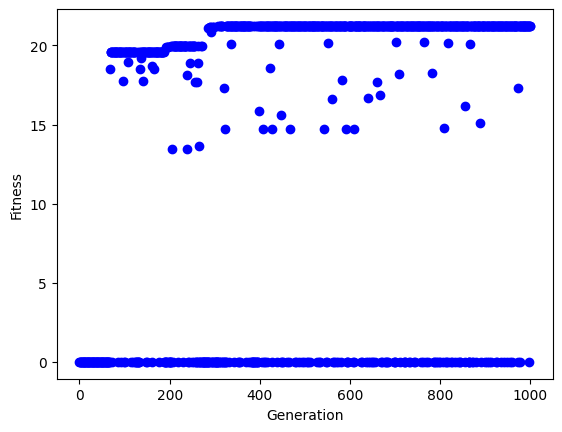

In [173]:
geneticAlgorithm = GeneticAlgorithm()
geneticAlgorithm.runAlgorithm()
geneticAlgorithm.showResults()

This is the packing approach : 
	 MazMaz: 0.0
	 Doogh-e-Abali: 0.0
	 Nani: 0.0
	 Jooj: 6.949130631490956
	 Hot-Dog: 0.0
	 Chips: 0.04616598650421544
	 Nooshaba: 0.0
	 Shokolat: 0.0
	 Chocoroll: 0.0
	 Cookies: 0.0
	 Abnabat: 0.0
	 Adams-Khersi: 0.0
	 Popcorn: 0.0
	 Pastil: 2.9926260000797864
	 Tordilla: 0.009799819748309568
	 Masghati: 0.0
	 Ghottab: 0.0
	 Saghe-Talaei: 0.0
	 Choob-Shoor: 0.0
The weight packed is:  9.997722437823267
The value packed is:  21.917232538175572


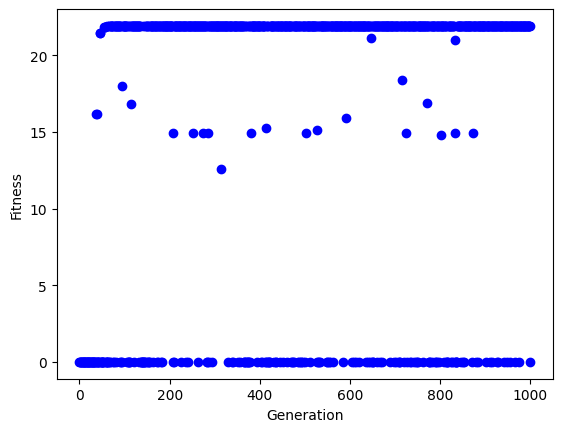

In [190]:
POPULATION_SIZE = 1000
consts = Consts(
    crossoverProbability = 0.5,
    mutationProbability = 0.1,
    carryPercent = 0.2,
    maxNumOfEvolutions = 1000,
    selectionWeights = [i for i in range(1, POPULATION_SIZE+1)]
)

geneticAlgorithm = GeneticAlgorithm()
geneticAlgorithm.runAlgorithm()
geneticAlgorithm.showResults()

This is the packing approach : 
	 MazMaz: 0.0
	 Doogh-e-Abali: 0.0
	 Nani: 0.598563338597839
	 Jooj: 3.8681691732505397
	 Hot-Dog: 0.0
	 Chips: 0.0
	 Nooshaba: 0.0
	 Shokolat: 0.0
	 Chocoroll: 0.0
	 Cookies: 0.0
	 Abnabat: 0.0
	 Adams-Khersi: 0.0
	 Popcorn: 0.0
	 Pastil: 2.8915484602610375
	 Tordilla: 0.0
	 Masghati: 0.0
	 Ghottab: 0.0
	 Saghe-Talaei: 2.641653044705805
	 Choob-Shoor: 0.0
The weight packed is:  9.99993401681522
The value packed is:  18.86313074319375


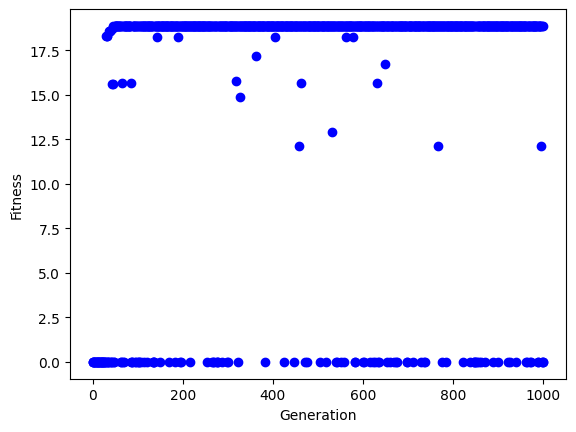

In [191]:
POPULATION_SIZE = 1000
consts = Consts(
    crossoverProbability = 0.7,
    mutationProbability = 0.1,
    carryPercent = 0.13,
    maxNumOfEvolutions = 1000,
    selectionWeights = [i for i in range(1, POPULATION_SIZE+1)]
)

geneticAlgorithm = GeneticAlgorithm()
geneticAlgorithm.runAlgorithm()
geneticAlgorithm.showResults()

This is the packing approach : 
	 MazMaz: 0.0
	 Doogh-e-Abali: 0.0
	 Nani: 0.0
	 Jooj: 4.508028362005161
	 Hot-Dog: 0.0
	 Chips: 0.20464706049004278
	 Nooshaba: 0.0
	 Shokolat: 0.0
	 Chocoroll: 0.0
	 Cookies: 0.0
	 Abnabat: 0.0
	 Adams-Khersi: 0.0
	 Popcorn: 2.359257706034308
	 Pastil: 2.9131003957678256
	 Tordilla: 0.0
	 Masghati: 0.0
	 Ghottab: 0.0
	 Saghe-Talaei: 0.0
	 Choob-Shoor: 0.0
The weight packed is:  9.985033524297338
The value packed is:  18.527677214037347


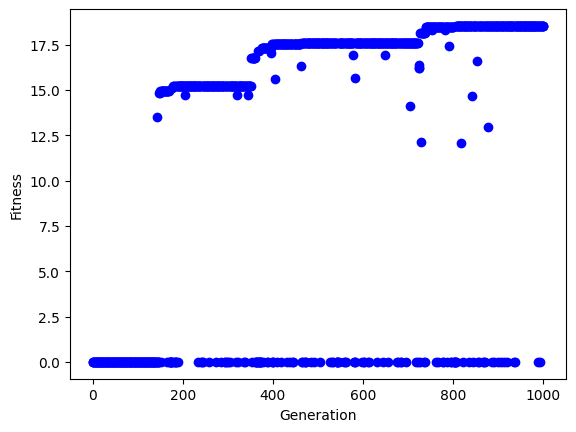

In [195]:
POPULATION_SIZE = 200
consts = Consts(
    crossoverProbability = 0.7,
    mutationProbability = 0.1,
    carryPercent = 0.13,
    maxNumOfEvolutions = 1000,
    selectionWeights = [i for i in range(1, POPULATION_SIZE+1)]
)

geneticAlgorithm = GeneticAlgorithm()
geneticAlgorithm.runAlgorithm()
geneticAlgorithm.showResults()

This is the packing approach : 
	 MazMaz: 0.0
	 Doogh-e-Abali: 0.0
	 Nani: 0.0
	 Jooj: 3.3920862713578765
	 Hot-Dog: 0.0
	 Chips: 0.0
	 Nooshaba: 0.0
	 Shokolat: 0.0
	 Chocoroll: 0.3471658545107813
	 Cookies: 0.0
	 Abnabat: 0.0
	 Adams-Khersi: 0.0
	 Popcorn: 0.0
	 Pastil: 2.9255107483302187
	 Tordilla: 0.0
	 Masghati: 0.0
	 Ghottab: 3.334268116949457
	 Saghe-Talaei: 0.0
	 Choob-Shoor: 0.0
The weight packed is:  9.999030991148334
The value packed is:  19.32107601495575


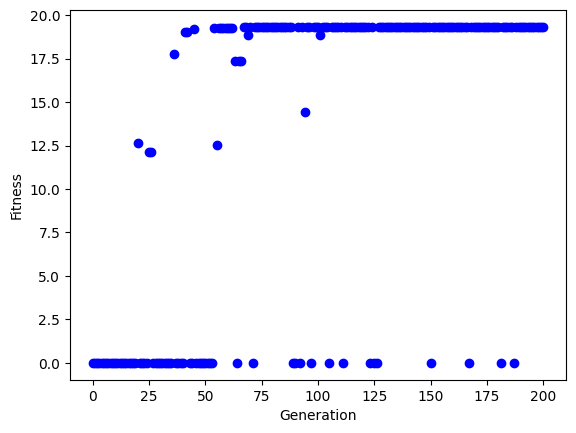

In [196]:
POPULATION_SIZE = 1000
consts = Consts(
    crossoverProbability = 0.7,
    mutationProbability = 0.1,
    carryPercent = 0.13,
    maxNumOfEvolutions = 200,
    selectionWeights = [i for i in range(1, POPULATION_SIZE+1)]
)

geneticAlgorithm = GeneticAlgorithm()
geneticAlgorithm.runAlgorithm()
geneticAlgorithm.showResults()

### What i guass:
So i've tasted different values for `crossoverProbabilty`, `mutationProbability`and `carryPercent` and i think something about 0.7 for `crossoverProbabilty`, 0.1 for `mutationProbability` and 0.1 or 0.15 for `carryPercent` is good!
One time I decrease the population size and another time I decreased the number of evoloution and I recognized that a higher number of population and lower number of evoulotion can reach a high and good result sooner but after a while, The improvement of generations are very little. On the other hand, If we have a lower number of population and higher number of evoulotion, at the first times, the result is not as good as the previous case! but the improvements are so impressive.

## Tasting for other inputs:

This is the packing approach : 
	 MazMaz: 8.276414312752522
	 Doogh-e-Abali: 0.0
	 Nani: 0.0
	 Jooj: 6.545958803412132
	 Hot-Dog: 0.0
	 Chips: 0.0
	 Nooshaba: 0.0
	 Shokolat: 0.0
	 Chocoroll: 7.062374986278776
	 Cookies: 0.0
	 Abnabat: 0.0
	 Adams-Khersi: 0.0
	 Popcorn: 0.0
	 Pastil: 2.7459446552640623
	 Tordilla: 0.0
	 Masghati: 4.30236704424259
	 Ghottab: 5.99066686373906
	 Saghe-Talaei: 0.07566559918365179
	 Choob-Shoor: 0.0
The weight packed is:  34.999392264872796
The value packed is:  51.94058921831234


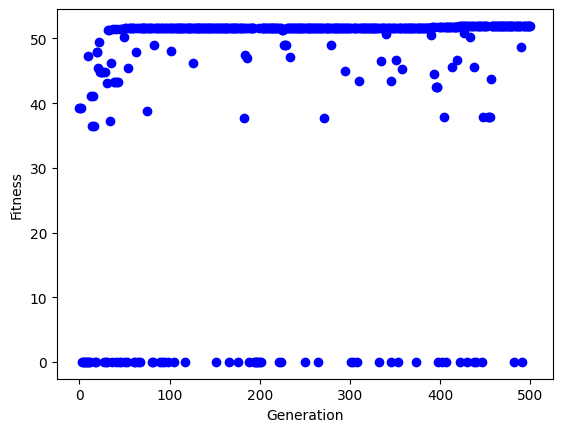

In [198]:
POPULATION_SIZE = 500
consts = Consts(
    crossoverProbability = 0.7,
    mutationProbability = 0.1,
    carryPercent = 0.13,
    maxNumOfEvolutions = 500,
    selectionWeights = [i for i in range(1, POPULATION_SIZE+1)]
)

inputs = Inputs(
    maxWeight = 35,
    minValue = 20,
    minNumber = 3,
    maxNumber = 7
)

geneticAlgorithm = GeneticAlgorithm()
geneticAlgorithm.runAlgorithm()
geneticAlgorithm.showResults()

This is the packing approach : 
	 MazMaz: 0.0
	 Doogh-e-Abali: 0.0
	 Nani: 0.033695988757838635
	 Jooj: 4.024438100719174
	 Hot-Dog: 0.0
	 Chips: 0.0
	 Nooshaba: 0.0
	 Shokolat: 0.0
	 Chocoroll: 0.0
	 Cookies: 0.0
	 Abnabat: 0.2676596733116563
	 Adams-Khersi: 0.0
	 Popcorn: 0.0
	 Pastil: 2.9465335347942325
	 Tordilla: 0.0
	 Masghati: 0.0
	 Ghottab: 0.0
	 Saghe-Talaei: 0.0
	 Choob-Shoor: 0.7250761731984593
The weight packed is:  7.997403470781362
The value packed is:  16.46969758965431


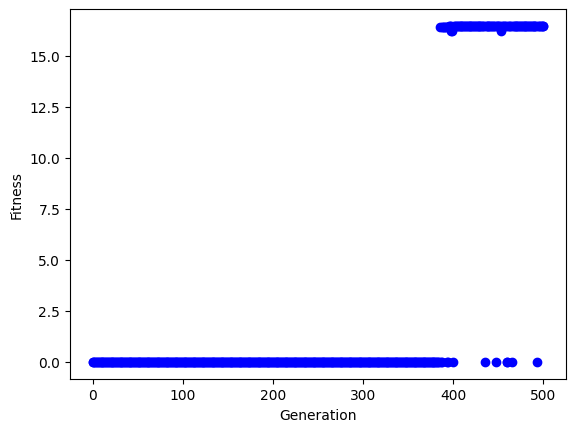

In [199]:
inputs = Inputs(
    maxWeight = 8,
    minValue = 16,
    minNumber = 4,
    maxNumber = 6
)

geneticAlgorithm = GeneticAlgorithm()
geneticAlgorithm.runAlgorithm()
geneticAlgorithm.showResults()

This is the packing approach : 
	 MazMaz: 9.999433554332699
	 Doogh-e-Abali: 14.922017745749095
	 Nani: 4.978216672836008
	 Jooj: 6.976416247946538
	 Hot-Dog: 19.994048416511973
	 Chips: 7.972248141628079
	 Nooshaba: 11.958217071725208
	 Shokolat: 5.988001951711068
	 Chocoroll: 8.98439811179302
	 Cookies: 10.99835942967642
	 Abnabat: 3.9932745056624532
	 Adams-Khersi: 13.936527864550913
	 Popcorn: 15.984409380943601
	 Pastil: 2.9913168517121393
	 Tordilla: 9.98988478356958
	 Masghati: 4.991624301914469
	 Ghottab: 6.992081942960523
	 Saghe-Talaei: 8.990685847350795
	 Choob-Shoor: 12.995177271837973
The weight packed is:  183.63634009441253
The value packed is:  179.6587929450037


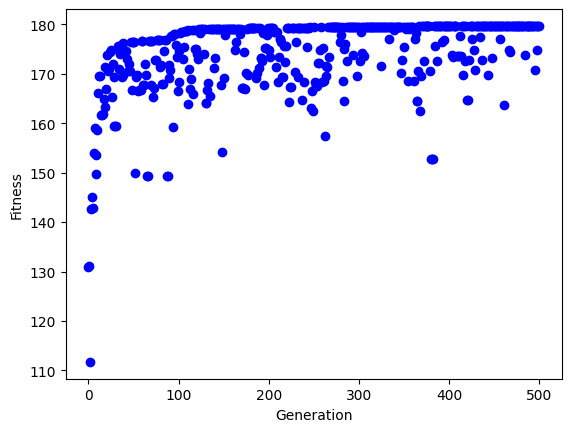

In [200]:
inputs = Inputs(
    maxWeight = 200,
    minValue = 0,
    minNumber = 0,
    maxNumber = 100
)

geneticAlgorithm = GeneticAlgorithm()
geneticAlgorithm.runAlgorithm()
geneticAlgorithm.showResults()

## Answering the questions:

1. **What problems can arise from having a very small or very large initial population?**
      ##### If population is too small:
      - the algorithm may not be able to explore the search space effectively and the algorithm may converge on a sub optimal solution 
      - the diversity in genes decreases and low diversity may cause loss of crucial info
      - because the population size is small we need to run the generations more to reach better solution so we otherwise it may result in a sub optimal solution

      ##### If the population is too big:
      - we need more computational resources 
      - it will result in having redundant genes   
<br>

2. **What effect does increasing the population size in each generation have on the accuracy and speed of the algorithm?**
   - As we increase the population size in each generation we get a more diverse generation with more abillity to explore which will result in more robustness against getting stuck in a local optima. so it will result in more percise algorithm. on the other hand the algorithm needs more computational power so it will result in a slower convergence or even not converging

3. **Explain and compare the effects of the crossover and mutation operations. Can we use only one of them? Why?**
   - Crossover and mutation are both essential operations in a genetic algorithm. Crossover combines the genetic information of two parents to produce offspring, promoting the exploration of new areas in the solution space. Mutation introduces small random changes in the offspring, maintaining diversity in the population and preventing premature convergence. Using only one of them might limit the algorithm's ability to explore the solution space effectively.

4. **What strategies do you suggest for reaching the solution faster in this specific problem?**
   - Strategies for speeding up the solution might include using a more efficient representation for the individuals, implementing parallel processing for the evaluation and evolution of individuals, or using more advanced selection, crossover, or mutation strategies that are specifically tailored to the problem at hand.

5. **Despite using these methods, it is still possible that the chromosomes may not change after several stages. Explain the reason for this occurrence and the problems it creates. What do you suggest to solve it?**
   - If the chromosomes are not changing after several generations, it might be due to a lack of diversity in the population, leading to premature convergence. This can be a problem as the algorithm might get stuck in a local optimum and fail to find the global optimum. To solve this, we could introduce mechanisms to maintain or increase diversity, such as increasing the mutation rate or implementing diversity-promoting selection strategies.

6. **What solution do you suggest for the program to terminate if the problem does not have a solution?**
   - If the problem does not have a solution, the program could implement a termination condition based on the lack of improvement over a certain number of generations. If the best solution found does not improve for a certain number of generations, the program could conclude that a solution may not exist and terminate the algorithm.
```